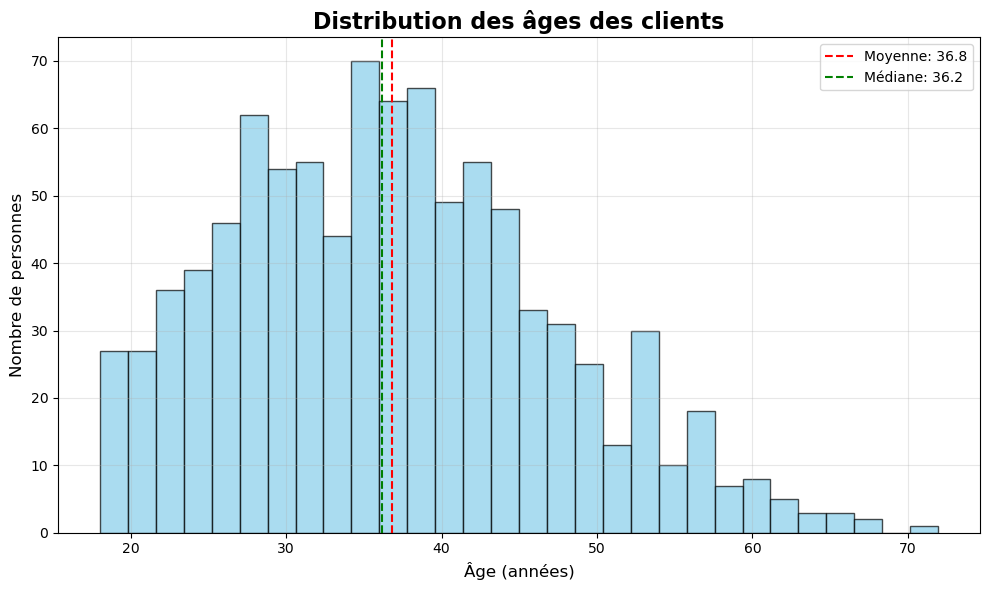

Statistiques des âges:
- Moyenne: 36.8 ans
- Médiane: 36.2 ans
- Écart-type: 10.3 ans
- Min: 18.0 ans
- Max: 71.9 ans


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#---------------------------
#Histogramme complet
#---------------------------
# Créer des données d'exemple
np.random.seed(42)
ages = np.random.normal(35, 12, 1000)  # Moyenne=35, écart-type=12
ages = ages[ages > 18]  # Garder seulement les adultes
ages = ages[ages < 80]  # Limiter l'âge maximum

data = pd.DataFrame({'age': ages})

# Créer un histogramme avec style
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution des âges des clients', fontsize=16, fontweight='bold')
plt.xlabel('Âge (années)', fontsize=12)
plt.ylabel('Nombre de personnes', fontsize=12)
plt.grid(True, alpha=0.3)

# Ajouter des statistiques sur le graphique
moyenne = data['age'].mean()
mediane = data['age'].median()
plt.axvline(moyenne, color='red', linestyle='--', label=f'Moyenne: {moyenne:.1f}')
plt.axvline(mediane, color='green', linestyle='--', label=f'Médiane: {mediane:.1f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Statistiques des âges:")
print(f"- Moyenne: {moyenne:.1f} ans")
print(f"- Médiane: {mediane:.1f} ans")
print(f"- Écart-type: {data['age'].std():.1f} ans")
print(f"- Min: {data['age'].min():.1f} ans")
print(f"- Max: {data['age'].max():.1f} ans")

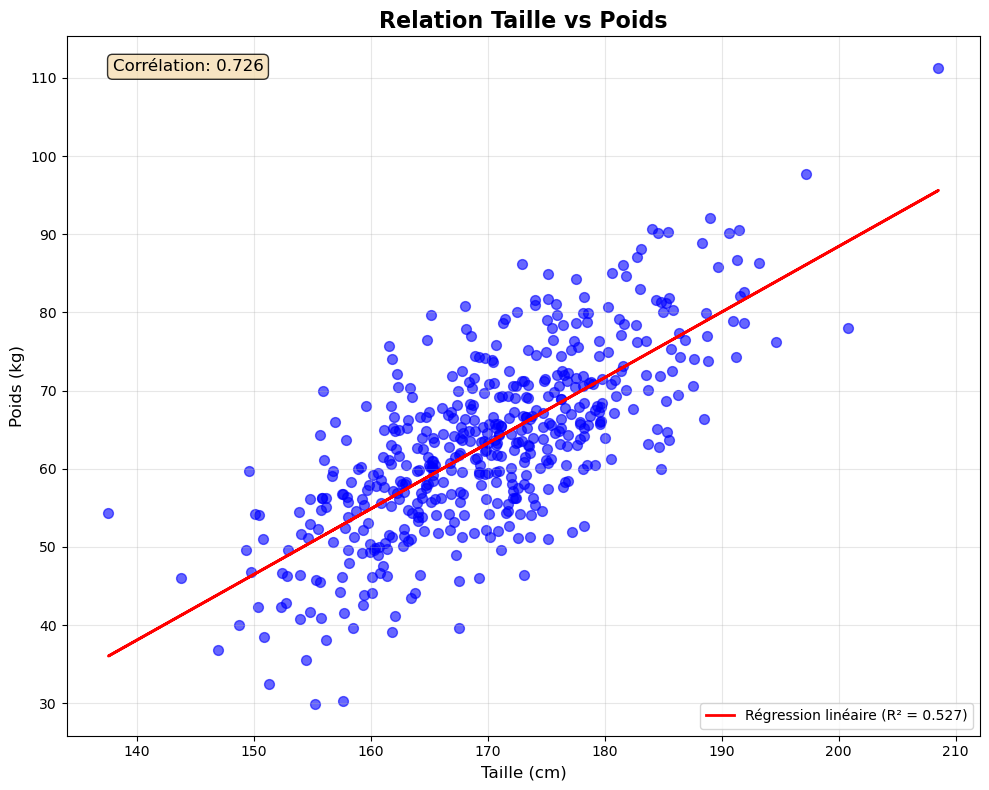

Analyse de corrélation:
- Coefficient de corrélation: 0.726
- R² (coefficient de détermination): 0.527
- P-value: 4.69e-83
→ Forte corrélation positive


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


#Scatter Plot complet
# Créer des données réalistes taille/poids
np.random.seed(42)
n_personnes = 500

# Générer des tailles (distribution normale)
tailles = np.random.normal(170, 10, n_personnes)  # Moyenne 170cm

# Générer des poids corrélés avec la taille + bruit
poids_base = (tailles - 100) * 0.9  # Formule approximative
bruit = np.random.normal(0, 8, n_personnes)  # Variabilité individuelle
poids = poids_base + bruit

# Créer le DataFrame
data = pd.DataFrame({
    'taille': tailles,
    'poids': poids
})

# Créer le nuage de points avec régression
plt.figure(figsize=(10, 8))
plt.scatter(data['taille'], data['poids'], alpha=0.6, color='blue', s=50)

# Ajouter la ligne de régression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['taille'], data['poids'])
line = slope * data['taille'] + intercept
plt.plot(data['taille'], line, 'r-', linewidth=2, 
         label=f'Régression linéaire (R² = {r_value**2:.3f})')

# Personnaliser le graphique
plt.title('Relation Taille vs Poids', fontsize=16, fontweight='bold')
plt.xlabel('Taille (cm)', fontsize=12)
plt.ylabel('Poids (kg)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# Ajouter des statistiques
correlation = data['taille'].corr(data['poids'])
plt.text(0.05, 0.95, f'Corrélation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Analyse de corrélation:")
print(f"- Coefficient de corrélation: {correlation:.3f}")
print(f"- R² (coefficient de détermination): {r_value**2:.3f}")
print(f"- P-value: {p_value:.2e}")
if correlation > 0.7:
    print("→ Forte corrélation positive")
elif correlation > 0.3:
    print("→ Corrélation modérée")
else:
    print("→ Corrélation faible")

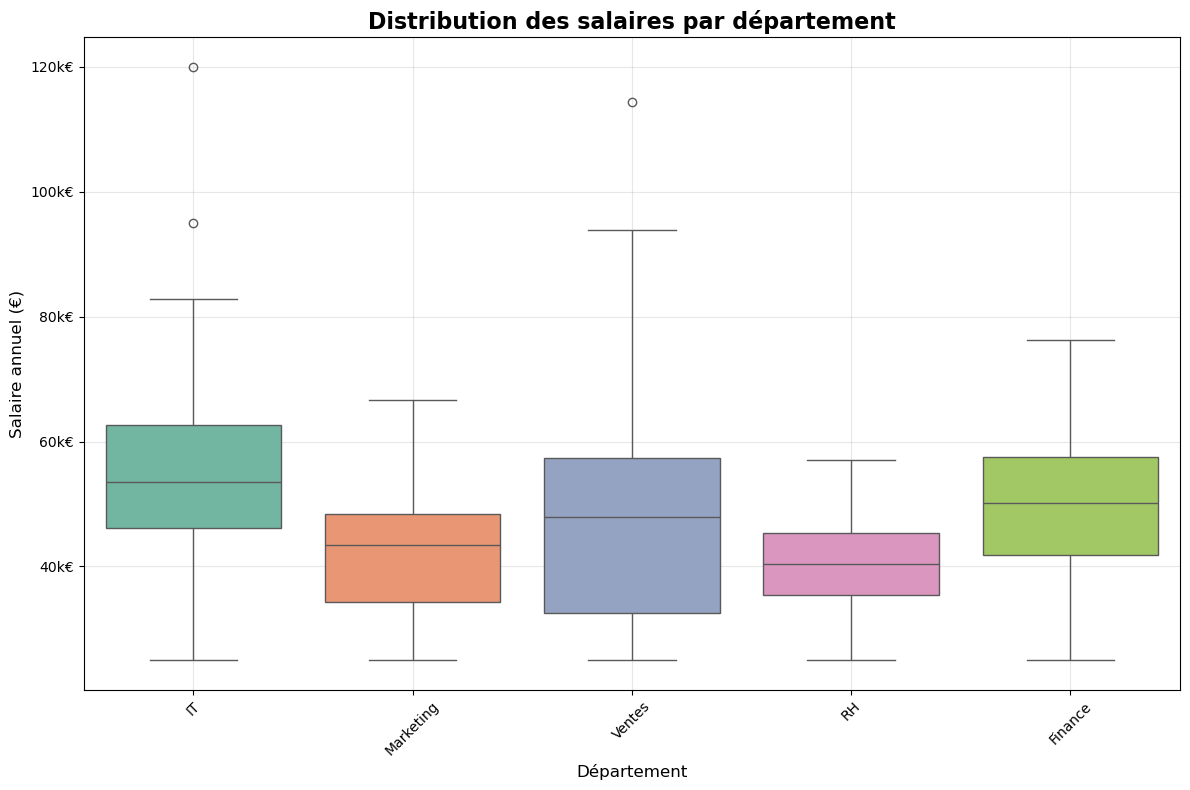

Statistiques par département:
IT:
  - Médiane: 53,593€
  - Q1: 46,134€ | Q3: 62,637€
  - IQR: 16,503€
  - Valeurs aberrantes: 2
    → 95,000€ à 120,000€

Marketing:
  - Médiane: 43,371€
  - Q1: 34,241€ | Q3: 48,391€
  - IQR: 14,150€
  - Valeurs aberrantes: 0

Ventes:
  - Médiane: 47,942€
  - Q1: 32,468€ | Q3: 57,323€
  - IQR: 24,854€
  - Valeurs aberrantes: 1
    → 114,349€ à 114,349€

RH:
  - Médiane: 40,363€
  - Q1: 35,460€ | Q3: 45,337€
  - IQR: 9,877€
  - Valeurs aberrantes: 0

Finance:
  - Médiane: 50,223€
  - Q1: 41,750€ | Q3: 57,502€
  - IQR: 15,752€
  - Valeurs aberrantes: 0



In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Boxplot complet
# Créer des données de salaires réalistes par département
np.random.seed(42)

# Différents départements avec salaires différents
departements = ['IT', 'Marketing', 'Ventes', 'RH', 'Finance']
salaires_data = []

for dept in departements:
    if dept == 'IT':
        salaires = np.random.normal(55000, 15000, 100)
    elif dept == 'Finance':
        salaires = np.random.normal(50000, 12000, 80)
    elif dept == 'Marketing':
        salaires = np.random.normal(42000, 10000, 70)
    elif dept == 'Ventes':
        salaires = np.random.normal(45000, 18000, 90)  # Plus de variabilité
    else:  # RH
        salaires = np.random.normal(40000, 8000, 60)
    
    # Ajouter quelques valeurs aberrantes
    if dept == 'IT':
        salaires = np.append(salaires, [95000, 120000])  # Architectes seniors
    
    # Créer le DataFrame
    for salaire in salaires:
        salaires_data.append({'departement': dept, 'salaire': max(25000, salaire)})

data = pd.DataFrame(salaires_data)

# Créer des boxplots comparatifs
plt.figure(figsize=(12, 8))

# Utiliser seaborn pour un boxplot plus joli
#sns.boxplot(data=data, x='departement', y='salaire', palette='Set2') #erreur corrigé
#codigo proposé pour corriger l'erreur
sns.boxplot(
    data=data,
    x='departement',
    y='salaire',
    hue='departement',
    palette='Set2',
    legend=False
)

# Personnaliser le graphique
plt.title('Distribution des salaires par département', fontsize=16, fontweight='bold')
plt.xlabel('Département', fontsize=12)
plt.ylabel('Salaire annuel (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Formatter l'axe Y en milliers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}k€'))

plt.tight_layout()
plt.show()

# Afficher les statistiques détaillées
print("Statistiques par département:")
print("=" * 50)

for dept in departements:
    dept_data = data[data['departement'] == dept]['salaire']
    q1 = dept_data.quantile(0.25)
    median = dept_data.median()
    q3 = dept_data.quantile(0.75)
    iqr = q3 - q1
    
    # Détecter les outliers
    outliers = dept_data[(dept_data < q1 - 1.5*iqr) | (dept_data > q3 + 1.5*iqr)]
    
    print(f"{dept}:")
    print(f"  - Médiane: {median:,.0f}€")
    print(f"  - Q1: {q1:,.0f}€ | Q3: {q3:,.0f}€")
    print(f"  - IQR: {iqr:,.0f}€")
    print(f"  - Valeurs aberrantes: {len(outliers)}")
    if len(outliers) > 0:
        print(f"    → {outliers.min():,.0f}€ à {outliers.max():,.0f}€")
    print()

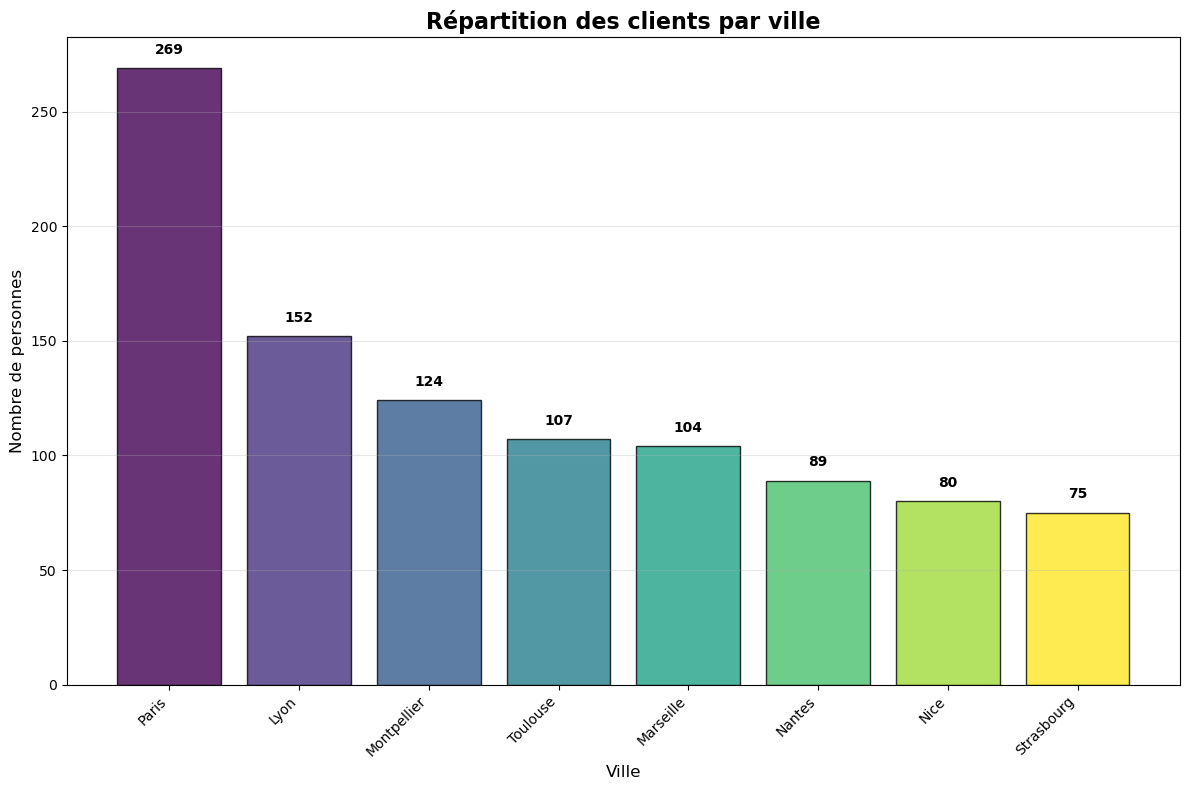

Tableau de fréquences:
      Ville  Effectif  Pourcentage
      Paris       269         26.9
       Lyon       152         15.2
Montpellier       124         12.4
   Toulouse       107         10.7
  Marseille       104         10.4
     Nantes        89          8.9
       Nice        80          8.0
 Strasbourg        75          7.5

Total: 1000 personnes


In [11]:
#Bar Chart complet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Créer des données de villes avec populations réalistes
np.random.seed(42)

# Définir les villes avec leurs poids de probabilité
villes = ['Paris', 'Lyon', 'Marseille', 'Toulouse', 'Nice', 'Nantes', 'Strasbourg', 'Montpellier']
probabilites = [0.25, 0.15, 0.12, 0.10, 0.08, 0.10, 0.08, 0.12]  # Paris plus représenté

# Générer 1000 personnes selon ces probabilités
villes_personnes = np.random.choice(villes, size=1000, p=probabilites)
data = pd.DataFrame({'ville': villes_personnes})

# Compter les occurrences et trier
counts = data['ville'].value_counts()

# Créer le graphique en barres
plt.figure(figsize=(12, 8))

# Utiliser des couleurs dégradées
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))
bars = plt.bar(counts.index, counts.values, color=colors, alpha=0.8, edgecolor='black')

# Personnaliser le graphique
plt.title('Répartition des clients par ville', fontsize=16, fontweight='bold')
plt.xlabel('Ville', fontsize=12)
plt.ylabel('Nombre de personnes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for bar, count in zip(bars, counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Afficher le tableau de fréquences
print("Tableau de fréquences:")
print("=" * 40)
total = counts.sum()
freq_table = pd.DataFrame({
    'Ville': counts.index,
    'Effectif': counts.values,
    'Pourcentage': (counts.values / total * 100).round(1)
}).reset_index(drop=True)

print(freq_table.to_string(index=False))
print(f"\nTotal: {total} personnes")

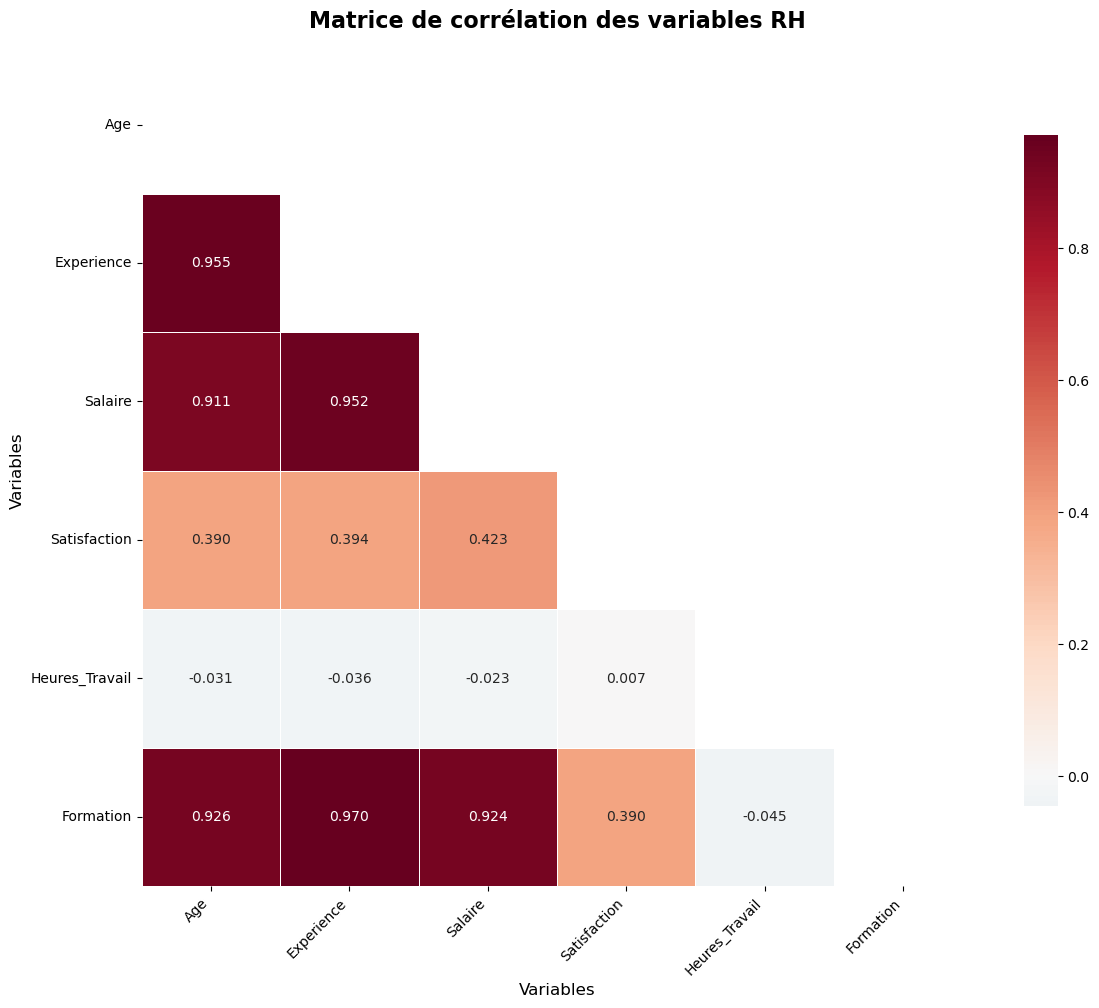

Analyse des corrélations:
Corrélations significatives (|r| > 0.5):
• Experience ↔ Formation: 0.970 (positive, très forte)
• Age ↔ Experience: 0.955 (positive, très forte)
• Experience ↔ Salaire: 0.952 (positive, très forte)
• Age ↔ Formation: 0.926 (positive, très forte)
• Salaire ↔ Formation: 0.924 (positive, très forte)
• Age ↔ Salaire: 0.911 (positive, très forte)

Matrice de corrélation complète:
                  Age  Experience  Salaire  Satisfaction  Heures_Travail  \
Age             1.000       0.955    0.911         0.390          -0.031   
Experience      0.955       1.000    0.952         0.394          -0.036   
Salaire         0.911       0.952    1.000         0.423          -0.023   
Satisfaction    0.390       0.394    0.423         1.000           0.007   
Heures_Travail -0.031      -0.036   -0.023         0.007           1.000   
Formation       0.926       0.970    0.924         0.390          -0.045   

                Formation  
Age                 0.926  
Experie

In [13]:
#Seaborn Heatmap complet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Créer un dataset avec plusieurs variables corrélées
np.random.seed(42)
n_samples = 1000

# Variables avec corrélations réalistes
age = np.random.normal(35, 10, n_samples)
experience = age - 22 + np.random.normal(0, 3, n_samples)  # Corrélé avec âge
salaire = 25000 + experience * 1500 + np.random.normal(0, 5000, n_samples)
satisfaction = 7 + (salaire - salaire.mean()) / salaire.std() * 0.5 + np.random.normal(0, 1, n_samples)
heures_travail = np.random.normal(40, 5, n_samples)
formation = experience * 0.8 + np.random.normal(0, 2, n_samples)

# Créer le DataFrame
data = pd.DataFrame({
    'Age': age,
    'Experience': experience,
    'Salaire': salaire,
    'Satisfaction': satisfaction,
    'Heures_Travail': heures_travail,
    'Formation': formation
})

# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Créer la heatmap avec style personnalisé
plt.figure(figsize=(12, 10))

# Masquer la diagonale supérieure pour éviter la redondance
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Créer la heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True,              # Afficher les valeurs
            cmap='RdBu_r',           # Couleurs rouge-bleu inversées
            center=0,                # Centrer sur 0
            square=True,             # Cellules carrées
            linewidths=0.5,          # Lignes entre cellules
            cbar_kws={"shrink": 0.8}, # Ajuster la colorbar
            fmt='.3f')               # Format des nombres

plt.title('Matrice de corrélation des variables RH', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Analyser les corrélations significatives
print("Analyse des corrélations:")
print("=" * 50)

# Trouver les corrélations fortes (> 0.5 ou < -0.5)
correlations_fortes = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_val = correlation_matrix.iloc[i, j]
        
        if abs(corr_val) > 0.5:
            correlations_fortes.append((var1, var2, corr_val))

# Trier par valeur absolue décroissante
correlations_fortes.sort(key=lambda x: abs(x[2]), reverse=True)

print("Corrélations significatives (|r| > 0.5):")
for var1, var2, corr in correlations_fortes:
    direction = "positive" if corr > 0 else "négative"
    force = "très forte" if abs(corr) > 0.8 else "forte" if abs(corr) > 0.6 else "modérée"
    print(f"• {var1} ↔ {var2}: {corr:.3f} ({direction}, {force})")

if not correlations_fortes:
    print("Aucune corrélation forte détectée dans ce dataset.")

print(f"\nMatrice de corrélation complète:")
print(correlation_matrix.round(3))

In [21]:
#Inspection initiale complète
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Exemple avec le dataset Titanic (disponible en ligne)
try:
    # Essayer de charger depuis une URL
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    data = pd.read_csv(url)
    print("✓ Dataset Titanic chargé depuis internet")
except:
    # Créer des données d'exemple si pas d'internet
    np.random.seed(42)
    n = 500
    data = pd.DataFrame({
        'Age': np.random.normal(35, 15, n),
        'Fare': np.random.exponential(30, n),
        'Sex': np.random.choice(['male', 'female'], n),
        'Pclass': np.random.choice([1, 2, 3], n, p=[0.2, 0.3, 0.5]),
        'Survived': np.random.choice([0, 1], n)
    })
    print("✓ Dataset d'exemple créé (pas de connexion internet)")

print("\n" + "="*60)
print("INSPECTION INITIALE DU DATASET")
print("="*60)

# 1. Informations de base
print(f"📊 Dimensions: {data.shape[0]:,} lignes × {data.shape[1]} colonnes")
print(f"💾 Mémoire utilisée: {data.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# 2. Types de données
print(f"\n📋 Types de colonnes:")
type_counts = data.dtypes.value_counts()
for dtype, count in type_counts.items():
    print(f"  • {dtype}: {count} colonnes")

# 3. Aperçu des colonnes
print(f"\n📝 Liste des colonnes:")
for i, col in enumerate(data.columns, 1):
    dtype_str = str(data[col].dtype)
    null_count = data[col].isnull().sum()
    null_pct = (null_count / len(data)) * 100
    print(f"  {i:2d}. {col:<15} | {dtype_str:<10} | {null_count:3d} nulls ({null_pct:4.1f}%)")

# 4. Aperçu des données
print(f"\n👀 Premières lignes du dataset:")
print(data.head())

# 5. Statistiques rapides
print(f"\n📈 Statistiques des variables numériques:")
numeric_cols = data.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(data[numeric_cols].describe().round(2))
else:
    print("  Aucune variable numérique détectée")

# 6. Variables catégorielles
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    print(f"\n🏷️  Variables catégorielles ({len(categorical_cols)}):")
    for col in categorical_cols:
        unique_count = data[col].nunique()
        most_common = data[col].mode().iloc[0] if len(data[col].mode()) > 0 else "N/A"
        print(f"  • {col}: {unique_count} valeurs uniques, plus fréquente: '{most_common}'")

print(f"\n✅ Inspection terminée - Dataset prêt pour l'exploration !")

✓ Dataset Titanic chargé depuis internet

INSPECTION INITIALE DU DATASET
📊 Dimensions: 891 lignes × 12 colonnes
💾 Mémoire utilisée: 0.3 MB

📋 Types de colonnes:
  • int64: 5 colonnes
  • object: 5 colonnes
  • float64: 2 colonnes

📝 Liste des colonnes:
   1. PassengerId     | int64      |   0 nulls ( 0.0%)
   2. Survived        | int64      |   0 nulls ( 0.0%)
   3. Pclass          | int64      |   0 nulls ( 0.0%)
   4. Name            | object     |   0 nulls ( 0.0%)
   5. Sex             | object     |   0 nulls ( 0.0%)
   6. Age             | float64    | 177 nulls (19.9%)
   7. SibSp           | int64      |   0 nulls ( 0.0%)
   8. Parch           | int64      |   0 nulls ( 0.0%)
   9. Ticket          | object     |   0 nulls ( 0.0%)
  10. Fare            | float64    |   0 nulls ( 0.0%)
  11. Cabin           | object     | 687 nulls (77.1%)
  12. Embarked        | object     |   2 nulls ( 0.2%)

👀 Premières lignes du dataset:
   PassengerId  Survived  Pclass  \
0            1     